In [ ]:
cd drive/MyDrive/Live_workshops_treinamentos/2022_05_ML_precos_carros

/content/drive/MyDrive/Live_workshops_treinamentos/2022_05_ML_precos_carros


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# MODELO ML

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_metadados_final = pd.read_csv("df_metadados_final.csv")
df_metadados_final.columns

Index(['ID', 'Ano', 'VALOR_LIMPO', 'VALOR_LIMPO_LOG', 'KM', 'KM_LOG',
       'ANO_LOG', 'automático', 'manual', 'semi-automático', 'diesel',
       'elétrico', 'flex', 'gasolina', 'gásnatural', 'híbrido', 'álcool'],
      dtype='object')

## DEFININDO BASE TREINO E TESTE
- Selecionando os atriutos para X e Y
- Os atributos foram selecionados com base nas análise de correlação feita na análise exploratória.


In [ ]:
## CRIANDO LISTA COM AS COLUNAS QUE SERÃO EXCLUÍDAS
drop_colunas_x = ['ID','VALOR_LIMPO','VALOR_LIMPO_LOG','manual','álcool','híbrido','gásnatural','elétrico','semi-automático']

dados_modelo = df_metadados_final.copy()

## DIVIDINDO X E Y 
# apenas valores originais
x = dados_modelo.drop(columns=drop_colunas_x+['KM_LOG','ANO_LOG']) #excluindo variaveis LOG
y = dados_modelo.VALOR_LIMPO

# apenas valores log
x_log = dados_modelo.drop(columns=drop_colunas_x+['KM','Ano'])
y_log = dados_modelo.VALOR_LIMPO_LOG

## DIVIDINDO BASE TEM TREINO(80%) E TESTE(20%)
x_treino, x_teste,y_treino,y_teste = train_test_split(x,y,test_size=.2,random_state=1234)

x_treino_log, x_teste_log,y_treino_log,y_teste_log = train_test_split(x_log,y_log,test_size=.2,random_state=1234)

x_treino.columns,x_treino_log.columns

(Index(['Ano', 'KM', 'automático', 'diesel', 'flex', 'gasolina'], dtype='object'),
 Index(['KM_LOG', 'ANO_LOG', 'automático', 'diesel', 'flex', 'gasolina'], dtype='object'))

## TREINANDO MODELOS


In [ ]:
## LISTA PRA ARMAZENAR O VALOR DA MÉTRICA(R²) DOS MODELOS
resultados = []

## MODELO COM DADOS VALORES ABSOLUTOS
lr = LinearRegression()
lr.fit(x_treino,y_treino)
resultados.append( ('lr',lr.score(x_teste,y_teste)) ) #GERANDO O R² E SALVANDO NA LISTA DE RESULTADOS

## MODELO COM DADOS VALORES NORMALIZADOS COM LOG
lr_log = LinearRegression()
lr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('lr_log',lr_log.score(x_teste_log,y_teste_log)) )

#print("Métrica R²")
#print(lr.score(x_teste,y_teste))
#print(lr_log.score(x_teste_log,y_teste_log))

In [ ]:
## MODELO COM DADOS VALORES ABSOLUTOS
dtr = DecisionTreeRegressor()
dtr.fit(x_treino,y_treino)
resultados.append( ('dtr', dtr.score(x_teste,y_teste)) )

## MODELO COM DADOS VALORES NORMALIZADOS COM LOG
dtr_log = DecisionTreeRegressor()
dtr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('dtr_log', dtr_log.score(x_teste_log,y_teste_log)) )

## VARIÁVEIS IMPORTANTES DO MODELO
#pd.DataFrame(index=x_treino.columns,data=dtr.feature_importances_,columns=['VALOR']).sort_values('VALOR').plot(kind='bar')
#pd.DataFrame(index=x_treino_log.columns,data=dtr_log.feature_importances_,columns=['VALOR']).sort_values('VALOR').plot(kind='bar')

In [ ]:
## MODELO COM DADOS VALORES ABSOLUTOS
rfr = RandomForestRegressor()
rfr.fit(x_treino,y_treino)
resultados.append( ('rfr', rfr.score(x_teste,y_teste)) )

## MODELO COM DADOS VALORES NORMALIZADOS COM LOG
rfr_log = RandomForestRegressor()
rfr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('rfr_log', rfr_log.score(x_teste_log,y_teste_log)) ) 

## VARIÁVEIS IMPORTANTES DO MODELO
#pd.DataFrame(index=x_treino.columns,data=rfr.feature_importances_,columns=['VALOR']).sort_values('VALOR').plot(kind='bar')
#pd.DataFrame(index=x_treino_log.columns,data=rfr_log.feature_importances_,columns=['VALOR']).sort_values('VALOR').plot(kind='bar')


## VALIDANDO MODELO


0.6645020612226993 0.7853370352612005


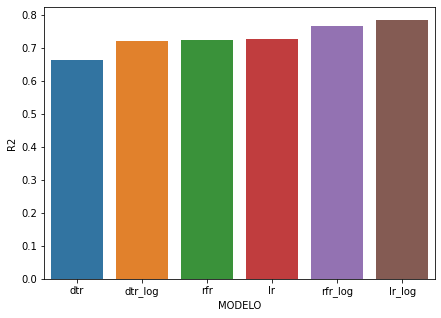

In [ ]:
plt.figure(figsize=(7,5))

## GERANDO DATAFRAME COM A LISTA DOS RESULTADO (R²)
df_resultados = pd.DataFrame(resultados,columns=['MODELO','R2'])

print(df_resultados.R2.min(), df_resultados.R2.max())

sns.barplot(x='MODELO',y='R2',data = df_resultados.sort_values('R2'))
plt.show()

In [ ]:
## SELECIONANDO i REGISTROS PARA FAZER PREDIÇÃO COM O MELHOR MODELO
# DE ACORDO COM ANÁLISE ANTERIOR
i = 150
modelo_final = LinearRegression()
modelo_final.fit(x_treino_log,y_treino_log)

## GERANDO INDEX PARA GERAR O GRÁFICO
index = range(len(x_teste_log[:i]))

## FAZENDO PREDIÇÃO NA BASE DE TESTE
pred = modelo_final.predict(x_teste_log[:i])
pred[:10]

array([10.8339204 ,  9.93645694, 11.30819541,  9.59355753, 11.39738615,
       10.02682022, 11.49690612, 10.96571365, 10.92295219, 10.83330703])

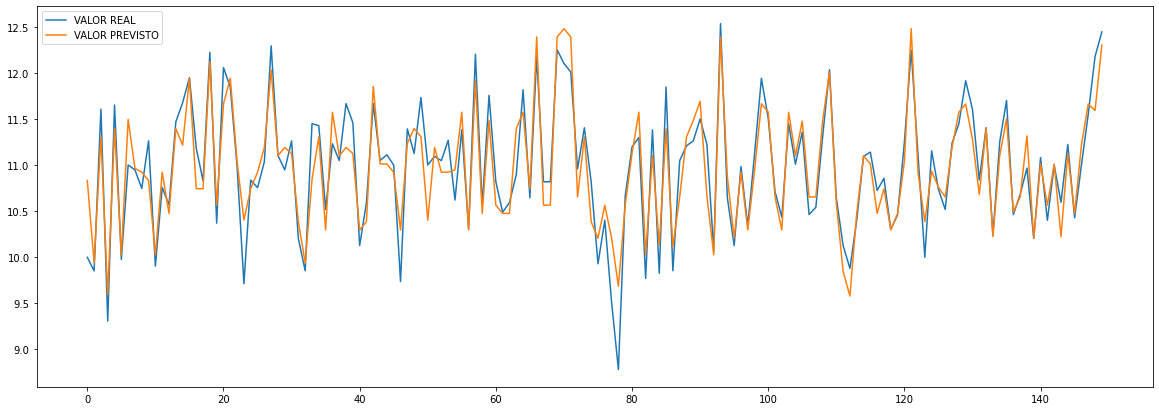

In [ ]:
## VISUALIZANDO VALORES REAIS E PREVISTOS EM LOG
plt.figure(figsize=(20,7))
plt.plot(index, y_teste_log[:i],label='real')
plt.plot(index, pred,label='previsto')
plt.legend(['VALOR REAL','VALOR PREVISTO'])
plt.show()

**REVERTENDO VALOR LOG**

In [ ]:
## CONVERTENDO VALOR LOG PARA VALOR ORIGINAL
# BASTA USAR O EXPONENCIAL(np.ex())
for x in zip(pred[:10], np.exp(pred)[:10]):
  print(f"VALOR LOG: {x[0]} - VALOR NORMAL: {round(x[1])}")

VALOR LOG: 10.833920403969614 - VALOR NORMAL: 50712
VALOR LOG: 9.936456939114578 - VALOR NORMAL: 20670
VALOR LOG: 11.308195409091013 - VALOR NORMAL: 81487
VALOR LOG: 9.59355752612214 - VALOR NORMAL: 14670
VALOR LOG: 11.397386150188368 - VALOR NORMAL: 89089
VALOR LOG: 10.026820221377875 - VALOR NORMAL: 22625
VALOR LOG: 11.496906118848074 - VALOR NORMAL: 98411
VALOR LOG: 10.965713654559067 - VALOR NORMAL: 57856
VALOR LOG: 10.922952185453141 - VALOR NORMAL: 55434
VALOR LOG: 10.833307030314927 - VALOR NORMAL: 50681


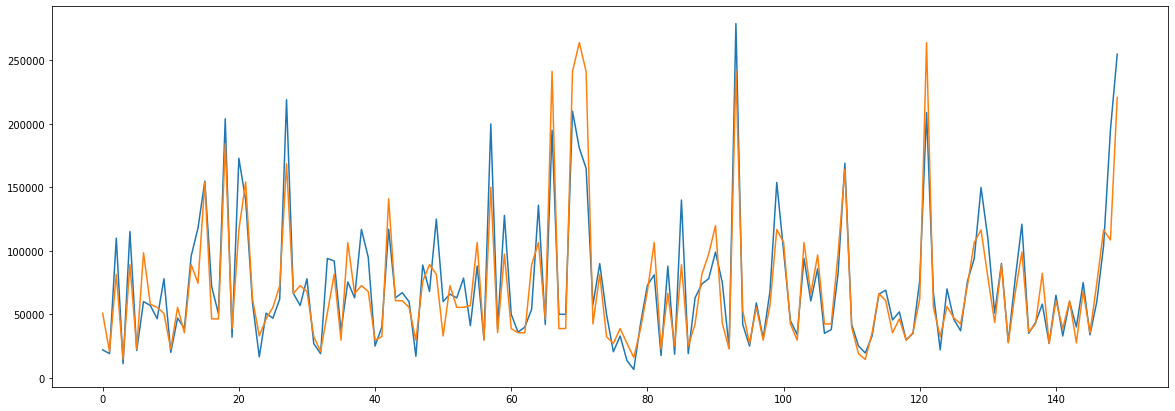

In [ ]:
## VISUALIZANDO VALORES REAIS E PREVISTOS ORIGINAIS
plt.figure(figsize=(20,7))
plt.plot(index, np.exp(y_teste_log[:i]),label='real')
plt.plot(index, np.exp(pred),label='previsto')
plt.show()

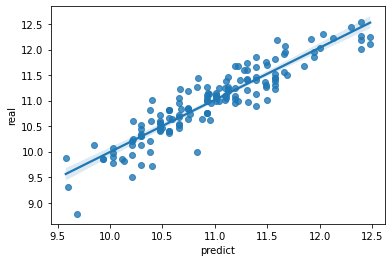

In [ ]:
## GERANDO UMA REGRESSÃO
i = 150
pred = modelo_final.predict(x_teste_log[:i])

sns.regplot(x=pred,y=y_teste_log[:i])

plt.xlabel('predict')
plt.ylabel('real')
plt.show()

## VARIAVEIS IMPORTANTES
- Análise para verificar quais variáveis foram importantes para o modelo. 
- No caso da regressão linear fazemos análises dos coeficientes que pode ser positivos ou negativos
- Quanto mais perto de 0, menos significante é a variável para o modelo.

In [ ]:
## GERANDO DATAFRAME COM OS COEFICIENTE
importances = pd.DataFrame(data={
    'attr': x_treino_log.columns,
    'importance': modelo_final.coef_
})
## ORDENANDO AS VARIÁVEIS
importances = importances.sort_values(by='importance', ascending=False)
importances

,attr,importance
1,ANO_LOG,180.296408
3,diesel,0.699257
2,automático,0.473654
5,gasolina,0.077597
0,KM_LOG,-0.001503
4,flex,-0.118748


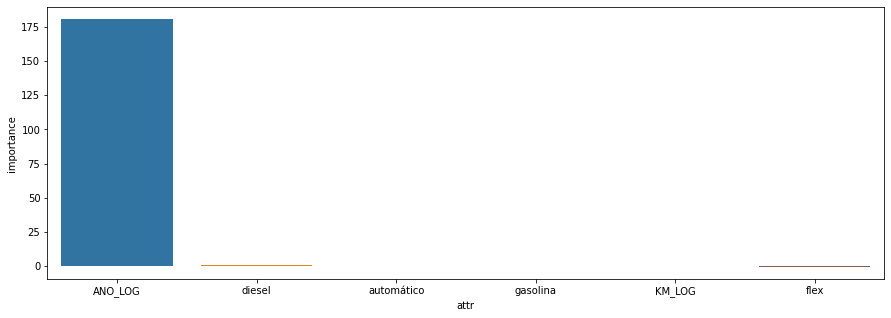

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'attr',y = 'importance',data = importances)

# SALVANDO MODELO FINAL
- Uma das formas de colocar um modelo em produção é salvá-lo em um objeto e carregá-lo em outro script em python
- Essa é a forma mais simples, mas bem útil pra quem está começando
- Podemos utilizar o pacote `joblib`

In [ ]:
import joblib as jb

In [ ]:
modelo_final = LinearRegression()
modelo_final.fit(x_treino_log,y_treino_log)
modelo_final.score(x_teste_log,y_teste_log)

0.7853812550398247

In [ ]:
## CRIANDO DICIONÁRIO COM INFORMAÇÕES SOBRE O MODELO
modelo = modelo_final
description="""modelo Regressão Linear para prever valores de automóveis. 
Foi utilizado a normalização LOG nas variáveis KM e ANO. \
Foram utilizadas as seguintes colunas: """ + " ','".join(x_log.columns)
date='02/06/2022'
version='0.1'
name_model='20220602_previsao_precos_automoveis'
metrics = {'r2': 0.78538}

dic_save_model = dict({
    'model': modelo,
    'metadata': {
        'description': description,
        'author': 'Gabriel Gomes',
        'date': date,
        'source_code_version': version,
        'metrics': metrics
    }
})
dic_save_model

{'metadata': {'author': 'Gabriel Gomes',
  'date': '02/06/2022',
  'description': "modelo Regressão Linear para prever valores de automóveis. Foi utilizado a normalização LOG nas variáveis KM e ANO. Foram utilizadas as seguintes colunas: KM_LOG ','ANO_LOG ','automático ','diesel ','flex ','gasolina",
  'metrics': {'r2': 0.78538},
  'source_code_version': '0.1'},
 'model': LinearRegression()}

In [ ]:
## SALVANDO MODELO NO DIRETÓRIO
jb.dump(dic_save_model, name_model+'.joblib')

['20220602_previsao_precos_automoveis.joblib']

# MELHORIAS QUE PODEM SER FEITAS (TRABALHOS FUTUROS)
- testar a combinação de outras variáveis explicativas (X), por exemplo, retirar KM já que tem uma correlação alta com ANO
- tratar melhor os valores outlier em ANO, KM e VALOR
  - principalmente outlier em relação a cada ano, por exemplo, há veículos antigos, antes de 2005, que tem valores acima de 100k, isso pode estar prejudicando o modelo.
- extrair infos da coluna TÍTULO e inserir como variáveis explicativa (X)
- **coletar os anúncios completos com outras infos dos automóveis, por exemplo, marca, modelo, cor etc.**